<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part1:-Anaconda-使用虚拟环境配置pytorch" data-toc-modified-id="Part1:-Anaconda-使用虚拟环境配置pytorch-1">Part1: Anaconda 使用虚拟环境配置pytorch</a></span><ul class="toc-item"><li><span><a href="#1.-点击开始菜单，进入Anaconda-Prompt命令行" data-toc-modified-id="1.-点击开始菜单，进入Anaconda-Prompt命令行-1.1">1. 点击开始菜单，进入Anaconda Prompt命令行</a></span></li><li><span><a href="#2.-在命令行中输入以下命令" data-toc-modified-id="2.-在命令行中输入以下命令-1.2">2. 在命令行中输入以下命令</a></span></li><li><span><a href="#3.-创建新的conda虚拟环境" data-toc-modified-id="3.-创建新的conda虚拟环境-1.3">3. 创建新的conda虚拟环境</a></span></li><li><span><a href="#4.-安装Pytorch" data-toc-modified-id="4.-安装Pytorch-1.4">4. 安装Pytorch</a></span></li><li><span><a href="#5.-在jupyter里面添加虚拟环境" data-toc-modified-id="5.-在jupyter里面添加虚拟环境-1.5">5. 在jupyter里面添加虚拟环境</a></span></li></ul></li><li><span><a href="#Part2:" data-toc-modified-id="Part2:-2">Part2:</a></span><ul class="toc-item"><li><span><a href="#1.-Load-data" data-toc-modified-id="1.-Load-data-2.1">1. Load data</a></span></li><li><span><a href="#2.-Prepare-data" data-toc-modified-id="2.-Prepare-data-2.2">2. Prepare data</a></span><ul class="toc-item"><li><span><a href="#2.1-reshape-y" data-toc-modified-id="2.1-reshape-y-2.2.1">2.1 reshape y</a></span></li><li><span><a href="#2.2-data-normalization" data-toc-modified-id="2.2-data-normalization-2.2.2">2.2 data normalization</a></span></li><li><span><a href="#2.3-put-data-into-torch-(numpy-to-torch)" data-toc-modified-id="2.3-put-data-into-torch-(numpy-to-torch)-2.2.3">2.3 put data into torch (numpy to torch)</a></span></li><li><span><a href="#2.4-splite-train-and-test-data-set" data-toc-modified-id="2.4-splite-train-and-test-data-set-2.2.4">2.4 splite train and test data set</a></span></li></ul></li><li><span><a href="#3.-Prepare-model" data-toc-modified-id="3.-Prepare-model-2.3">3. Prepare model</a></span><ul class="toc-item"><li><span><a href="#3.1-define-the-network" data-toc-modified-id="3.1-define-the-network-2.3.1">3.1 define the network</a></span></li><li><span><a href="#3.2-define-the-loss-function-and-optimizer" data-toc-modified-id="3.2-define-the-loss-function-and-optimizer-2.3.2">3.2 define the loss function and optimizer</a></span></li></ul></li><li><span><a href="#4.-model-training" data-toc-modified-id="4.-model-training-2.4">4. model training</a></span></li><li><span><a href="#5.-Visualize-the-results" data-toc-modified-id="5.-Visualize-the-results-2.5">5. Visualize the results</a></span><ul class="toc-item"><li><span><a href="#5.1-plot-the-loss" data-toc-modified-id="5.1-plot-the-loss-2.5.1">5.1 plot the loss</a></span></li><li><span><a href="#5.2-plot-true-VS-predict" data-toc-modified-id="5.2-plot-true-VS-predict-2.5.2">5.2 plot true VS predict</a></span></li></ul></li></ul></li></ul></div>

# Part1: Anaconda 使用虚拟环境配置pytorch
参考：
- https://www.cnblogs.com/yufeng97/p/13069247.html
- https://xirikm.net/2019/319-1
- https://www.cnblogs.com/somedayLi/p/12320878.html

## 1. 点击开始菜单，进入Anaconda Prompt命令行

## 2. 在命令行中输入以下命令

## 3. 创建新的conda虚拟环境

## 4. 安装Pytorch
- 这里比官网的命令少了一个`-c pytorch`。主要是因为`-c pytorch`表示指定使用pytorch channel，这个服务器位于国外，下载速度很慢，使用刚刚添加进default channel的清华镜像源可以得到一个较快的下载速度。
- cuda 的版本要根据自己的电脑配置来，这里我的是11.0。

## 5. 在jupyter里面添加虚拟环境

# Part2: 

In [1]:
import numpy as np
import torch
from torch import nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

## 1. Load data

In [2]:
boston = load_boston()
y = boston['target']
x = boston['data']
print(x.shape)
print(y.shape)

(506, 13)
(506,)


## 2. Prepare data
### 2.1 reshape y

In [3]:
y = y.reshape(-1,1)

### 2.2 data normalization

In [4]:
minMaxScaler = MinMaxScaler()
x = minMaxScaler.fit_transform(x)

### 2.3 put data into torch (numpy to torch)

In [5]:
x = torch.from_numpy(x).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.FloatTensor)

### 2.4 splite train and test data set

In [6]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.25)

## 3. Prepare model
### 3.1 define the network 

In [7]:
model = nn.Sequential(
    # input layer is 13; input layer number must be the number of input variables
    # hidden layer is 10; hidden layer number is defined by people
    nn.Linear(13, 10),
    # activation function is ReLU
    nn.ReLU(),
    # hidden layer is 10
    # out put layer is 1
    nn.Linear(10,1)
)

### 3.2 define the loss function and optimizer

In [8]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## 4. model training

In [9]:
max_epoch = 5000
iter_loss = []
for epoch in range(max_epoch):
    # forward propagation
    y_pred = model(train_x)
    # calculate the loss
    loss = loss_func(y_pred, train_y)
    # save loss to iter_loss
    iter_loss.append(loss.item())
    # clear the gradient
    optimizer.zero_grad()
    # backward propagation
    loss.backward() 
    # parameter update
    optimizer.step()
    
output = model(test_x)
predict_list = output.detach().numpy()

## 5. Visualize the results
### 5.1 plot the loss

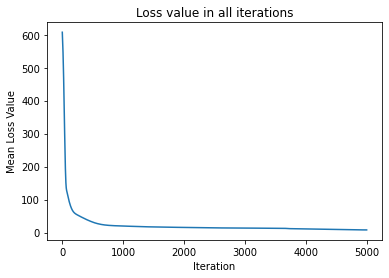

In [10]:
loss_x = np.arange(max_epoch)
loss_y = np.array(iter_loss) # list to nparray
plt.plot(loss_x, loss_y)
plt.title('Loss value in all iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean Loss Value')
plt.show()

### 5.2 plot true VS predict

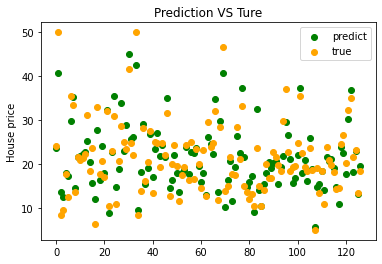

In [11]:
x = np.arange(test_x.shape[0])   # x
y1 = np.array(predict_list)      # predict result
y2 = np.array(test_y)            # true result
line1 = plt.scatter(x, y1, c='green',label='predict')
line2 = plt.scatter(x, y2, c='orange',label='true')
plt.legend(loc='best')
plt.title('Prediction VS Ture')
plt.ylabel('House price')
plt.show()

**Scatter plot can not show the pair relationship of predict and true, maybe line plot is better.**

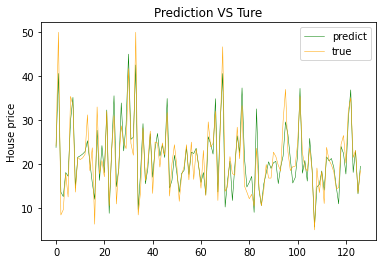

In [12]:
x = np.arange(test_x.shape[0])   # x
y1 = np.array(predict_list)      # predict result
y2 = np.array(test_y)            # true result
line1 = plt.plot(x, y1, c='green',label='predict',lw=0.5)
line2 = plt.plot(x, y2, c='orange',label='true',lw=0.5)
plt.legend(loc='best')
plt.title('Prediction VS Ture')
plt.ylabel('House price')
plt.show()